In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [3]:
dfsa = pd.read_csv('Advertising.csv')
dfsa  

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
dfsa.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
dfsa.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
dfsa.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
dfsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
dfsa.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
dfsa.duplicated().sum()

0

In [16]:
dfsa.isna().sum()   

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [17]:
dfsa.shape

(200, 5)

In [18]:
dfsa["Sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [19]:
dfsa["Sales"].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

<Axes: xlabel='TV', ylabel='count'>

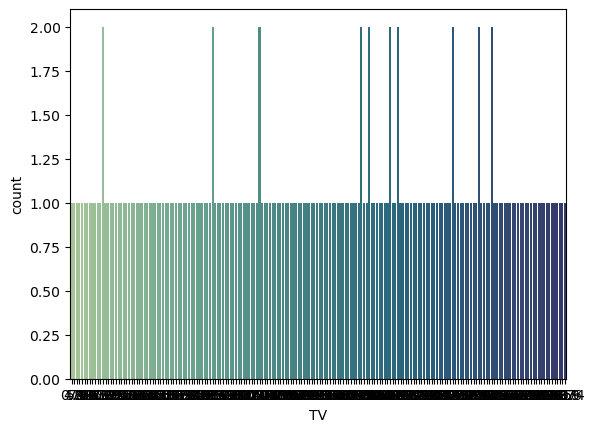

In [20]:
sns.countplot(x ='TV', data = dfsa,palette='crest')

C:\Users\HP\AppData\Local\Temp\ipykernel_21252\899472614.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.rugplot(x ='Newspaper', data = dfsa,palette='magma')


<Axes: xlabel='Newspaper'>

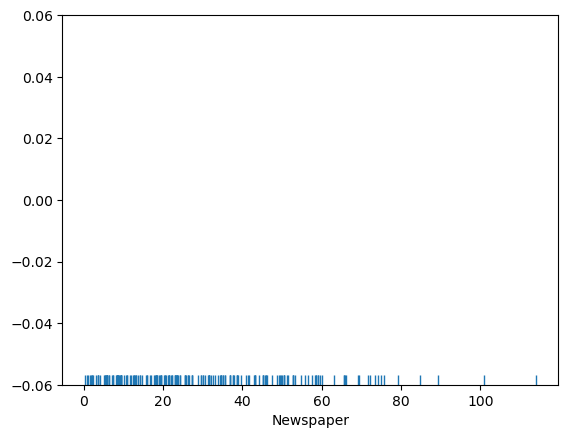

In [51]:
sns.rugplot(x ='Newspaper', data = dfsa,palette='magma')

<Axes: xlabel='Radio'>

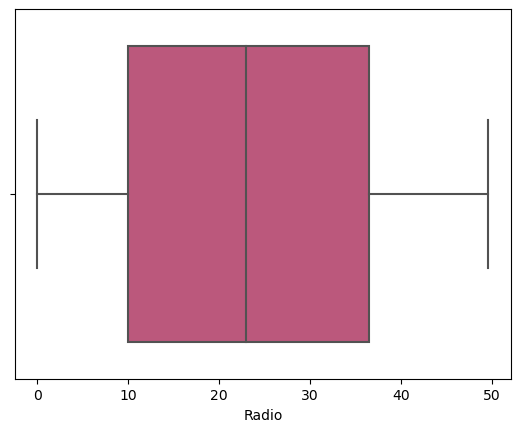

In [30]:
sns.boxplot(x ='Radio', data = dfsa,palette='plasma')

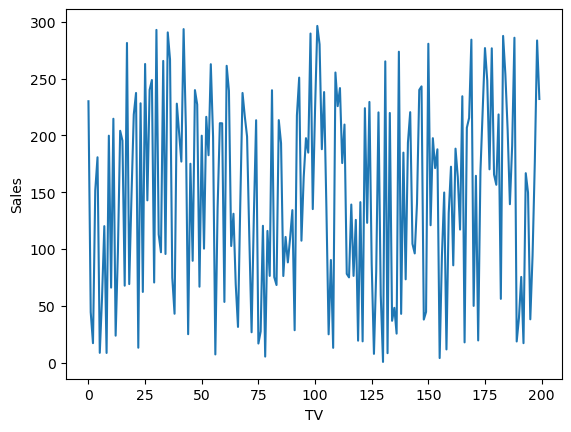

In [39]:
plt.plot(dfsa['TV'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

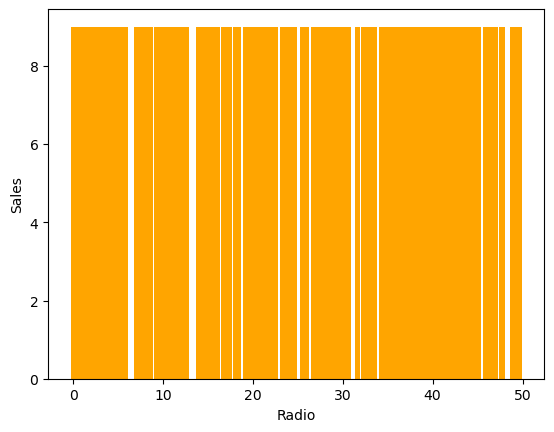

In [55]:
plt.bar(dfsa['Radio'], height=9, width=0.6, color='orange')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

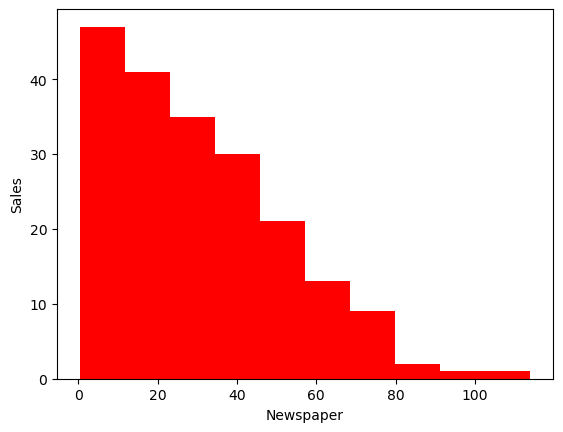

In [56]:
plt.hist(dfsa['Newspaper'], color='red')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

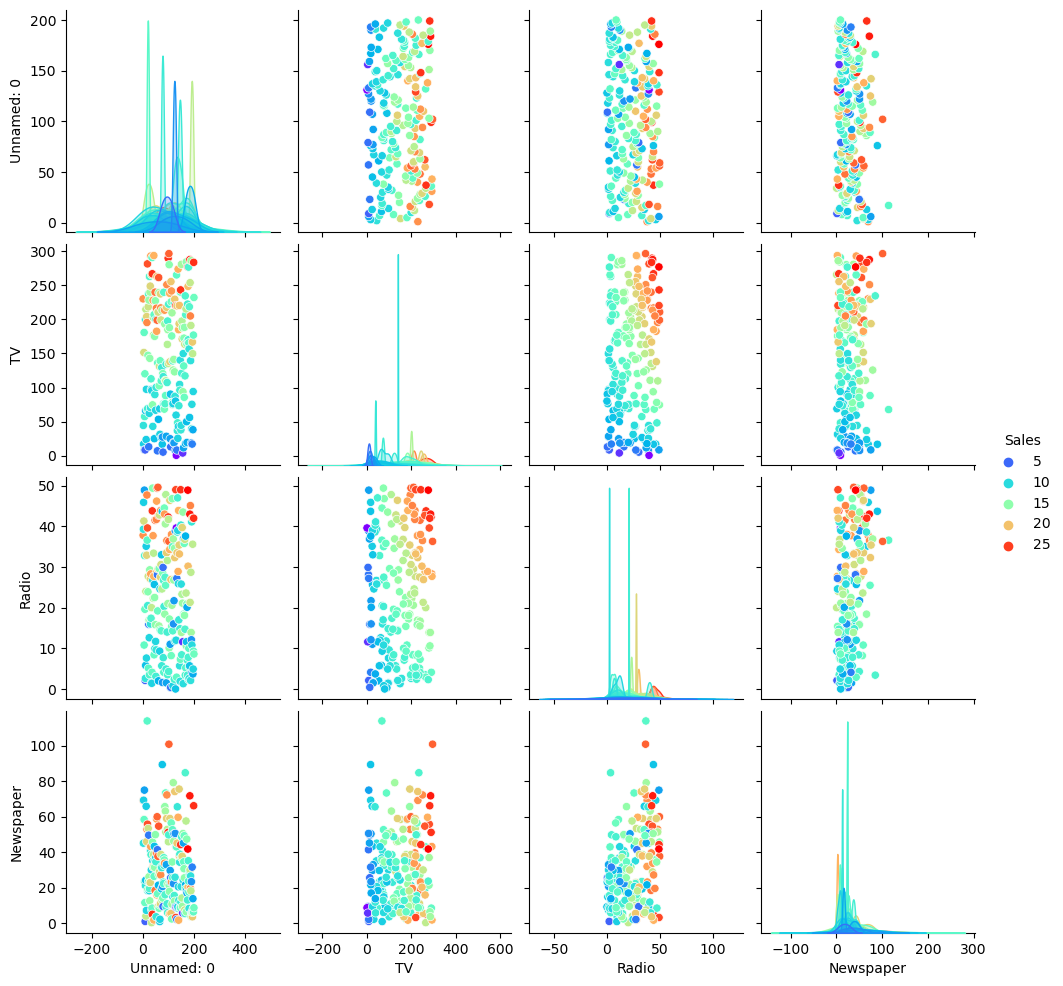

In [57]:
sns.pairplot(dfsa, hue='Sales',palette='rainbow')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(dfsa.drop(['Sales'],axis=1), 
                                                    dfsa['Sales'], test_size=0.80, 
                                                    random_state=80)

In [64]:
mod = LinearRegression()
mod.fit(X_train,y_train)

LinearRegression()

In [66]:
predict = mod.predict(X_test)
X_test.head()

,Unnamed: 0,TV,Radio,Newspaper
109,110,255.4,26.9,5.5
161,162,85.7,35.8,49.3
142,143,220.5,33.2,37.9
168,169,215.4,23.6,57.6
61,62,261.3,42.7,54.7


In [67]:
predict

array([19.5705218 , 14.48876555, 19.50222831, 17.55218609, 23.07433079,
       15.6022891 ,  6.5144259 , 11.49850128, 14.71222645, 19.40222593,
        9.9943383 , 21.55500616, 13.90791524, 20.27685265,  9.00166999,
       16.61319236,  7.64374027, 15.44081114, 10.73275868, 19.53546994,
       16.61284168, 16.4782808 , 16.59642617, 10.41304949, 13.2082103 ,
       14.88582291, 14.69900209, 20.51012321, 10.39764741, 12.00118154,
       13.48037452, 15.51923246, 12.58556708,  8.71977584, 21.06477384,
       14.18460185, 21.05921037, 13.65528473,  8.80680788, 18.28606571,
       21.26943325,  7.05300833, 17.42214932, 23.26827266, 20.90132958,
       20.95061621, 15.39582266, 10.19142234, 22.22662437, 17.33794942,
       15.20259656, 21.22032331, 13.90305166, 18.77657354, 18.10605351,
       11.62007406, 11.84216474, 12.98034583, 10.68721014, 18.56727099,
       12.6920069 , 11.25398277,  9.84776877,  9.82442085, 15.35743469,
       13.19447415, 12.69154423,  9.32719679, 11.00097917, 21.77

In [72]:
X_train_predictions = mod.predict(X_train)

In [73]:
X_train_predictions

array([10.83982836, 18.81475023, 17.44913417, 23.30572033, 15.03607602,
       13.39935138,  8.88799151, 16.54314328, 10.14329875,  9.59281728,
       15.61554828, 14.05554322,  7.40465442, 20.62270806, 16.89218104,
        9.06708945, 21.33254252, 12.58750279,  4.5658387 , 17.69245913,
        6.20230038,  4.56914358,  9.82196179, 13.63241237,  8.22212583,
       15.00920937, 20.98186534, 18.71424817, 12.44996482, 16.20555866,
       19.56391349, 21.2898179 , 10.6868356 ,  7.80841114, 18.27201396,
       12.83524754,  7.76625692, 11.89723307, 18.35133942, 24.87196171])

In [80]:
Accuracyscore=metrics.r2_score(y_test,predict)
Accuracyscore

0.8659183469088245

In [86]:
mod = DecisionTreeRegressor()
mod.fit(X_train, y_train)
predict = mod.predict(X_test)
print('Decision Tree R^2:', mod.score(X_test, y_test))

Decision Tree R^2: 0.8244962355372304
